In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pandas as pd
import qutip as qutip
from scipy.stats import norm
from scipy.optimize import minimize

In [2]:
data = np.loadtxt("esb_process_tomography_20230106.txt")

In [3]:
data

array([[0.00000000e+00, 1.54900000e+03, 1.67304270e+09, ...,
        5.97470716e-05, 2.05271226e-05, 2.69557757e-04],
       [0.00000000e+00, 1.54900000e+03, 1.67304270e+09, ...,
        5.47148920e-05, 2.55814248e-05, 2.68351461e-04],
       [0.00000000e+00, 1.54900000e+03, 1.67304270e+09, ...,
        5.09914789e-05, 1.84107976e-05, 2.71898491e-04],
       ...,
       [1.00000000e+00, 1.55000000e+03, 1.67308631e+09, ...,
        1.91771833e-05, 2.23076611e-04, 3.07907903e-05],
       [1.00000000e+00, 1.55000000e+03, 1.67308631e+09, ...,
        1.93471187e-05, 2.26085918e-04, 3.28826718e-05],
       [1.00000000e+00, 1.55000000e+03, 1.67308631e+09, ...,
        1.97867103e-05, 2.24718984e-04, 3.20671679e-05]])

In [140]:
time_h_1549 = []
time_h_1549_2 = []
time_h_1549_4 = []
time_h_1549_6 = []
time_h_1549_8 = []
time_h_1550 = []
time_d_1549 = []
time_d_1549_2 = []
time_d_1549_4 = []
time_d_1549_6 = []
time_d_1549_8 = []
time_d_1550 = []

In [141]:
vh_h_1549 = []
vh_h_1549_2 = []
vh_h_1549_4 = []
vh_h_1549_6 = []
vh_h_1549_8 = []
vh_h_1550 = []
vh_d_1549 = []
vh_d_1549_2 = []
vh_d_1549_4 = []
vh_d_1549_6 = []
vh_d_1549_8 = []
vh_d_1550 = []

In [142]:
da_h_1549 = []
da_h_1549_2 = []
da_h_1549_4 = []
da_h_1549_6 = []
da_h_1549_8 = []
da_h_1550 = []
da_d_1549 = []
da_d_1549_2 = []
da_d_1549_4 = []
da_d_1549_6 = []
da_d_1549_8 = []
da_d_1550 = []

In [143]:
pd_h_1549 = []
pd_h_1549_2 = []
pd_h_1549_4 = []
pd_h_1549_6 = []
pd_h_1549_8 = []
pd_h_1550 = []
pd_d_1549 = []
pd_d_1549_2 = []
pd_d_1549_4 = []
pd_d_1549_6 = []
pd_d_1549_8 = []
pd_d_1550 = []

In [144]:
pa_h_1549 = []
pa_h_1549_2 = []
pa_h_1549_4 = []
pa_h_1549_6 = []
pa_h_1549_8 = []
pa_h_1550 = []
pa_d_1549 = []
pa_d_1549_2 = []
pa_d_1549_4 = []
pa_d_1549_6 = []
pa_d_1549_8 = []
pa_d_1550 = []

In [145]:
def extract_data(lh,ld,lt,la,ldp,d):
    vh = d[4]/(13.47*d[3]/9)
    pd = d[5]/(d[6]+d[5])
    pa = d[6]/(d[6]+d[5])
    lt.append(datetime.datetime.fromtimestamp(d[2]))
    lh.append(vh)
    ld.append((pd-pa)/(np.sin(2*np.arctan(vh))))
    ldp.append(pd)
    la.append(pa)

In [146]:
for i,d in enumerate(data):
    if d[0] == 0:
        if d[1] == 1549:
            extract_data(vh_h_1549,da_h_1549,time_h_1549,pa_h_1549,pd_h_1549,d)
        if d[1] == 1549.5:
            extract_data(vh_h_1549_2,da_h_1549_2,time_h_1549_2,pa_h_1549_2,pd_h_1549_2,d)
        if d[1] == 1549.9:
            extract_data(vh_h_1549_4,da_h_1549_4,time_h_1549_4,pa_h_1549_4,pd_h_1549_4,d)
        if d[1] == 1549.99:
            extract_data(vh_h_1549_6,da_h_1549_6,time_h_1549_6,pa_h_1549_6,pd_h_1549_6,d)
        if d[1] == 1549.999:
            extract_data(vh_h_1549_8,da_h_1549_8,time_h_1549_8,pa_h_1549_8,pd_h_1549_8,d)
        if d[1] == 1550:
            extract_data(vh_h_1550,da_h_1550,time_h_1550,pa_h_1550,pd_h_1550,d)
    if d[0] == 1:
        if d[1] == 1549:
            extract_data(vh_d_1549,da_d_1549,time_d_1549,pa_d_1549,pd_d_1549,d)
        if d[1] == 1549.5:
            extract_data(vh_d_1549_2,da_d_1549_2,time_d_1549_2,pa_d_1549_2,pd_d_1549_2,d)
        if d[1] == 1549.9:
            extract_data(vh_d_1549_4,da_d_1549_4,time_d_1549_4,pa_d_1549_4,pd_d_1549_4,d)
        if d[1] == 1549.99:
            extract_data(vh_d_1549_6,da_d_1549_6,time_d_1549_6,pa_d_1549_6,pd_d_1549_6,d)
        if d[1] == 1549.999:
            extract_data(vh_d_1549_8,da_d_1549_8,time_d_1549_8,pa_d_1549_8,pd_d_1549_8,d)
        if d[1] == 1550:
            extract_data(vh_d_1550,da_d_1550,time_d_1550,pa_d_1550,pd_d_1550,d)

Text(0.5, 1.0, 'Rantoul Loop VH Polarization')

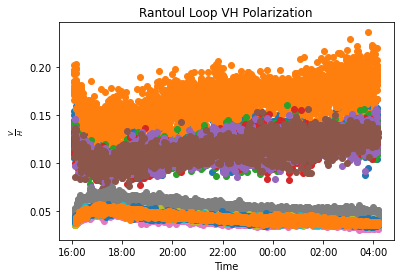

In [147]:
fig, ax = plt.subplots()
#ax2 = ax.twinx()
ax.plot(time_h_1549,vh_h_1549,label='H 1549',ls='',marker='o')
ax.plot(time_h_1549_2,vh_h_1549_2,label='H 1549.5',ls='',marker='o')
ax.plot(time_h_1549_4,vh_h_1549_4,label='H 1549.9',ls='',marker='o')
ax.plot(time_h_1549_6,vh_h_1549_6,label='H 1549.99',ls='',marker='o')
ax.plot(time_h_1549_8,vh_h_1549_8,label='H 1549.999',ls='',marker='o')
ax.plot(time_h_1550,vh_h_1550,label='H 1550',ls='',marker='o')
ax.plot(time_d_1549,vh_d_1549,label='D 1549',ls='',marker='o')
ax.plot(time_d_1549_2,vh_d_1549_2,label='D 1549.5',ls='',marker='o')
ax.plot(time_d_1549_4,vh_d_1549_4,label='D 1549.9',ls='',marker='o')
ax.plot(time_d_1549_6,vh_d_1549_6,label='D 1549.99',ls='',marker='o')
ax.plot(time_d_1549_8,vh_d_1549_8,label='D 1549.999',ls='',marker='o')
ax.plot(time_d_1550,vh_d_1550,label='D 1550',ls='',marker='o')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\frac{V}{H}$")
#ax.set_ylim(bottom=-1,top=100)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")

NameError: name 'time_h' is not defined

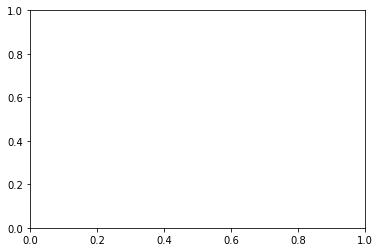

In [115]:
fig, ax = plt.subplots()
num_points = 1000
ax.plot(time_h[:num_points],vh_h[:num_points],label='H',ls='',marker='o')
ax.plot(time_d[:num_points],vh_d[:num_points],label='D',ls='',marker='o')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\frac{V}{H}$")
ax.set_ylim(bottom=1,top=20)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")
plt.legend(loc=1)

In [148]:
avg_vh_h_1549 = np.mean(np.array(vh_h_1549[:-6]).reshape(-1, 16), axis=1)
avg_vh_h_1549_2 = np.mean(np.array(vh_h_1549_2).reshape(-1, 16), axis=1)
avg_vh_h_1549_4 = np.mean(np.array(vh_h_1549_4[:-13]).reshape(-1, 16), axis=1)
avg_vh_h_1549_6 = np.mean(np.array(vh_h_1549_6[:-9]).reshape(-1, 16), axis=1)
avg_vh_h_1549_8 = np.mean(np.array(vh_h_1549_8[:-8]).reshape(-1, 16), axis=1)
avg_vh_h_1550 = np.mean(np.array(vh_h_1550[:-7]).reshape(-1, 16), axis=1)
avg_vh_d_1549 = np.mean(np.array(vh_d_1549[:-1]).reshape(-1, 16), axis=1)
avg_vh_d_1549_2 = np.mean(np.array(vh_d_1549_2[:-4]).reshape(-1, 16), axis=1)
avg_vh_d_1549_4 = np.mean(np.array(vh_d_1549_4[:-4]).reshape(-1, 16), axis=1)
avg_vh_d_1549_6 = np.mean(np.array(vh_d_1549_6[:-5]).reshape(-1, 16), axis=1)
avg_vh_d_1549_8 = np.mean(np.array(vh_d_1549_8[:-13]).reshape(-1, 16), axis=1)
avg_vh_d_1550 = np.mean(np.array(vh_d_1550[:-2]).reshape(-1, 16), axis=1)

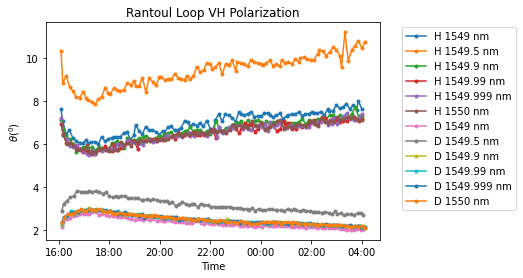

In [149]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_h_1549[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1549[:num_points][::2])),label='H 1549 nm',ls='-',marker='.')
ax.plot(time_h_1549_2[::16][:num_points][::2],np.degrees(np.arctan(avg_vh_h_1549_2[:num_points][::2])),label='H 1549.5 nm',ls='-',marker='.')
ax.plot(time_h_1549_4[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1549_4[:num_points][::2])),label='H 1549.9 nm',ls='-',marker='.')
ax.plot(time_h_1549_6[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1549_6[:num_points][::2])),label='H 1549.99 nm',ls='-',marker='.')
ax.plot(time_h_1549_8[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1549_8[:num_points][::2])),label='H 1549.999 nm',ls='-',marker='.')
ax.plot(time_h_1550[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1550[:num_points][::2])),label='H 1550 nm',ls='-',marker='.')
ax.plot(time_d_1549[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_d_1549[:num_points][::2])),label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_d_1549_2[:num_points][::2])),label='D 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_d_1549_4[:num_points][::2])),label='D 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_d_1549_6[:num_points][::2])),label='D 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][::2],np.degrees(np.arctan(avg_vh_d_1549_8[:num_points][::2])),label='D 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_d_1550[:num_points][::2])),label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\theta (^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.savefig('vh_drift_20221214.pdf')

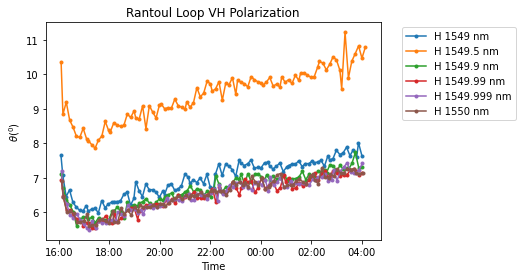

In [150]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_h_1549[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1549[:num_points][::2])),label='H 1549 nm',ls='-',marker='.')
ax.plot(time_h_1549_2[::16][:num_points][::2],np.degrees(np.arctan(avg_vh_h_1549_2[:num_points][::2])),label='H 1549.5 nm',ls='-',marker='.')
ax.plot(time_h_1549_4[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1549_4[:num_points][::2])),label='H 1549.9 nm',ls='-',marker='.')
ax.plot(time_h_1549_6[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1549_6[:num_points][::2])),label='H 1549.99 nm',ls='-',marker='.')
ax.plot(time_h_1549_8[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1549_8[:num_points][::2])),label='H 1549.999 nm',ls='-',marker='.')
ax.plot(time_h_1550[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1550[:num_points][::2])),label='H 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\theta (^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.savefig('vh_drift_20221214.pdf')

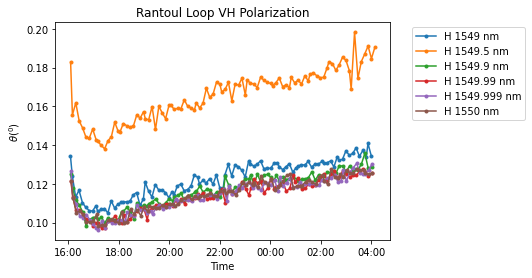

In [151]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_h_1549[::16][:num_points][::2][:-1],avg_vh_h_1549[:num_points][::2],label='H 1549 nm',ls='-',marker='.')
ax.plot(time_h_1549_2[::16][:num_points][::2],avg_vh_h_1549_2[:num_points][::2],label='H 1549.5 nm',ls='-',marker='.')
ax.plot(time_h_1549_4[::16][:num_points][::2][:-1],avg_vh_h_1549_4[:num_points][::2],label='H 1549.9 nm',ls='-',marker='.')
ax.plot(time_h_1549_6[::16][:num_points][::2][:-1],avg_vh_h_1549_6[:num_points][::2],label='H 1549.99 nm',ls='-',marker='.')
ax.plot(time_h_1549_8[::16][:num_points][::2][:-1],avg_vh_h_1549_8[:num_points][::2],label='H 1549.999 nm',ls='-',marker='.')
ax.plot(time_h_1550[::16][:num_points][::2][:-1],avg_vh_h_1550[:num_points][::2],label='H 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\theta (^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.savefig('vh_drift_20221214.pdf')

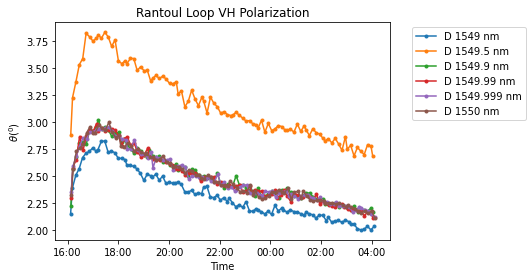

In [152]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_d_1549[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_d_1549[:num_points][::2])),label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_d_1549_2[:num_points][::2])),label='D 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_d_1549_4[:num_points][::2])),label='D 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_d_1549_6[:num_points][::2])),label='D 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][::2],np.degrees(np.arctan(avg_vh_d_1549_8[:num_points][::2])),label='D 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_d_1550[:num_points][::2])),label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\theta (^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.savefig('vh_drift_20221214.pdf')

In [153]:
avg_da_h_1549 = np.mean(np.array(da_h_1549[:-6]).reshape(-1, 16), axis=1)
avg_da_h_1549_2 = np.mean(np.array(da_h_1549_2).reshape(-1, 16), axis=1)
avg_da_h_1549_4 = np.mean(np.array(da_h_1549_4[:-13]).reshape(-1, 16), axis=1)
avg_da_h_1549_6 = np.mean(np.array(da_h_1549_6[:-9]).reshape(-1, 16), axis=1)
avg_da_h_1549_8 = np.mean(np.array(da_h_1549_8[:-8]).reshape(-1, 16), axis=1)
avg_da_h_1550 = np.mean(np.array(da_h_1550[:-7]).reshape(-1, 16), axis=1)
avg_da_d_1549 = np.mean(np.array(da_d_1549[:-1]).reshape(-1, 16), axis=1)
avg_da_d_1549_2 = np.mean(np.array(da_d_1549_2[:-4]).reshape(-1, 16), axis=1)
avg_da_d_1549_4 = np.mean(np.array(da_d_1549_4[:-4]).reshape(-1, 16), axis=1)
avg_da_d_1549_6 = np.mean(np.array(da_d_1549_6[:-5]).reshape(-1, 16), axis=1)
avg_da_d_1549_8 = np.mean(np.array(da_d_1549_8[:-13]).reshape(-1, 16), axis=1)
avg_da_d_1550 = np.mean(np.array(da_d_1550[:-2]).reshape(-1, 16), axis=1)

/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in arccos
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in arccos
  after removing the cwd from sys.path.
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in arccos
  """
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arccos
  
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in arccos
  import sys
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in arccos
  
/Users/keshavkapoor/anaconda3/lib/python3.7

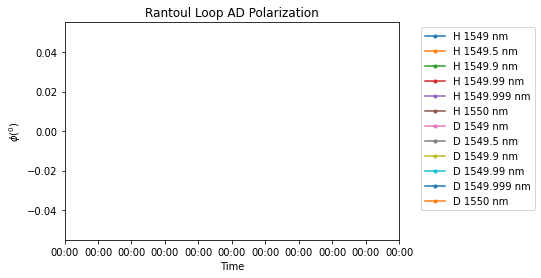

In [154]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_h_1549[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1549[:num_points][::2])),label='H 1549 nm',ls='-',marker='.')
ax.plot(time_h_1549_2[::16][:num_points][::2],np.degrees(np.arccos(avg_da_h_1549_2[:num_points][::2])),label='H 1549.5 nm',ls='-',marker='.')
ax.plot(time_h_1549_4[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1549_4[:num_points][::2])),label='H 1549.9 nm',ls='-',marker='.')
ax.plot(time_h_1549_6[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1549_6[:num_points][::2])),label='H 1549.99 nm',ls='-',marker='.')
ax.plot(time_h_1549_8[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1549_8[:num_points][::2])),label='H 1549.999 nm',ls='-',marker='.')
ax.plot(time_h_1550[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1550[:num_points][::2])),label='H 1550 nm',ls='-',marker='.')
ax.plot(time_d_1549[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_d_1549[:num_points][::2])),label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_d_1549_2[:num_points][::2])),label='D 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_d_1549_4[:num_points][::2])),label='D 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_d_1549_6[:num_points][::2])),label='D 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][::2],np.degrees(np.arccos(avg_da_d_1549_8[:num_points][::2])),label='D 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_d_1550[:num_points][::2])),label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi (^0)$")
#ax.set_ylim(bottom=1,top=10)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in arccos
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in arccos
  after removing the cwd from sys.path.
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in arccos
  """
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arccos
  
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in arccos
  import sys
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in arccos
  


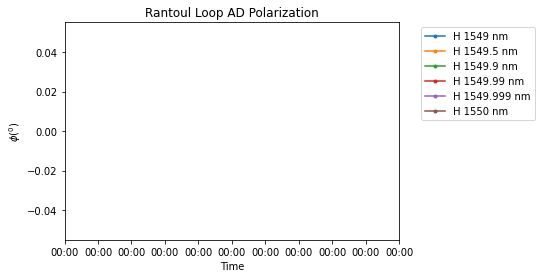

In [155]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_h_1549[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1549[:num_points][::2])),label='H 1549 nm',ls='-',marker='.')
ax.plot(time_h_1549_2[::16][:num_points][::2],np.degrees(np.arccos(avg_da_h_1549_2[:num_points][::2])),label='H 1549.5 nm',ls='-',marker='.')
ax.plot(time_h_1549_4[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1549_4[:num_points][::2])),label='H 1549.9 nm',ls='-',marker='.')
ax.plot(time_h_1549_6[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1549_6[:num_points][::2])),label='H 1549.99 nm',ls='-',marker='.')
ax.plot(time_h_1549_8[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1549_8[:num_points][::2])),label='H 1549.999 nm',ls='-',marker='.')
ax.plot(time_h_1550[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1550[:num_points][::2])),label='H 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi (^0)$")
#ax.set_ylim(bottom=1,top=10)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in arccos
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in arccos
  after removing the cwd from sys.path.
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in arccos
  """
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arccos
  
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in arccos
  import sys
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in arccos
  


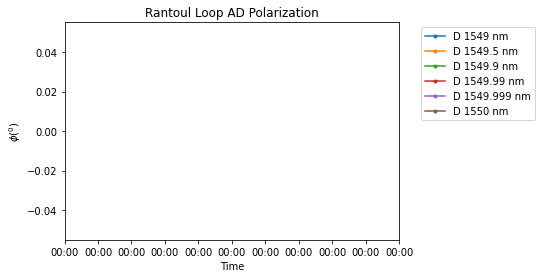

In [156]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_d_1549[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_d_1549[:num_points][::2])),label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_d_1549_2[:num_points][::2])),label='D 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_d_1549_4[:num_points][::2])),label='D 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_d_1549_6[:num_points][::2])),label='D 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][::2],np.degrees(np.arccos(avg_da_d_1549_8[:num_points][::2])),label='D 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_d_1550[:num_points][::2])),label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi (^0)$")
#ax.set_ylim(bottom=1,top=10)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

ValueError: x and y must have same first dimension, but have shapes (97,) and (96,)

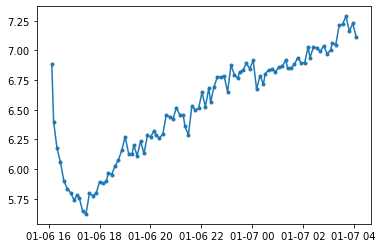

In [125]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_d_1549[::16][:num_points][::2][:-1],avg_da_d_1549[:num_points][::2],label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][::2],avg_da_d_1549_2[:num_points][::2],label='D 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][::2],avg_da_d_1549_4[:num_points][::2],label='D 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][::2],avg_da_d_1549_6[:num_points][::2],label='D 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][::2],avg_da_d_1549_8[:num_points][::2],label='D 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][::2],avg_da_d_1550[:num_points][::2],label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi (^0)$")
#ax.set_ylim(bottom=1,top=10)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [157]:
avg_pa_h_1549 = np.mean(np.array(pa_h_1549[:-6]).reshape(-1, 16), axis=1)
avg_pa_h_1549_2 = np.mean(np.array(pa_h_1549_2).reshape(-1, 16), axis=1)
avg_pa_h_1549_4 = np.mean(np.array(pa_h_1549_4[:-13]).reshape(-1, 16), axis=1)
avg_pa_h_1549_6 = np.mean(np.array(pa_h_1549_6[:-9]).reshape(-1, 16), axis=1)
avg_pa_h_1549_8 = np.mean(np.array(pa_h_1549_8[:-8]).reshape(-1, 16), axis=1)
avg_pa_h_1550 = np.mean(np.array(pa_h_1550[:-7]).reshape(-1, 16), axis=1)
avg_pa_d_1549 = np.mean(np.array(pa_d_1549[:-1]).reshape(-1, 16), axis=1)
avg_pa_d_1549_2 = np.mean(np.array(pa_d_1549_2[:-4]).reshape(-1, 16), axis=1)
avg_pa_d_1549_4 = np.mean(np.array(pa_d_1549_4[:-4]).reshape(-1, 16), axis=1)
avg_pa_d_1549_6 = np.mean(np.array(pa_d_1549_6[:-5]).reshape(-1, 16), axis=1)
avg_pa_d_1549_8 = np.mean(np.array(pa_d_1549_8[:-13]).reshape(-1, 16), axis=1)
avg_pa_d_1550 = np.mean(np.array(pa_d_1550[:-2]).reshape(-1, 16), axis=1)

ValueError: x and y must have same first dimension, but have shapes (96,) and (97,)

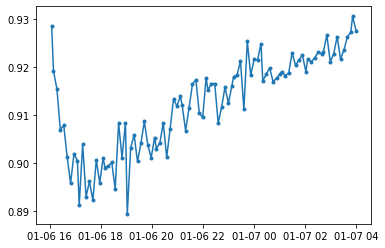

In [158]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_h_1549[::16][:num_points][::2][:-1],avg_pa_h_1549[:num_points][::2],label='H 1549 nm',ls='-',marker='.')
ax.plot(time_h_1549_2[::16][:num_points][::2][:-1],avg_pa_h_1549_2[:num_points][::2],label='H 1549.5 nm',ls='-',marker='.')
ax.plot(time_h_1549_4[::16][:num_points][::2],avg_pa_h_1549_4[:num_points][::2],label='H 1549.9 nm',ls='-',marker='.')
ax.plot(time_h_1549_6[::16][:num_points][::2][:-1],avg_pa_h_1549_6[:num_points][::2],label='H 1549.99 nm',ls='-',marker='.')
ax.plot(time_h_1549_8[::16][:num_points][::2][:-1],avg_pa_h_1549_8[:num_points][::2],label='H 1549.999 nm',ls='-',marker='.')
ax.plot(time_h_1550[::16][:num_points][::2][:-1],avg_pa_h_1550[:num_points][::2],label='H 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"Pa")
#ax.set_ylim(bottom=1,top=10)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

ValueError: x and y must have same first dimension, but have shapes (97,) and (96,)

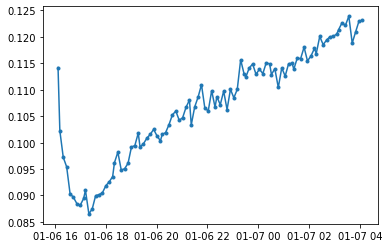

In [159]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_d_1549[::16][:num_points][::2][:-1],avg_pa_d_1549[:num_points][::2],label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][::2],avg_pa_d_1549_2[:num_points][::2],label='D 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][::2],avg_pa_d_1549_4[:num_points][::2],label='D 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][::2],avg_pa_d_1549_6[:num_points][::2],label='D 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][::2],avg_pa_d_1549_8[:num_points][::2],label='D 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][::2],avg_pa_d_1550[:num_points][::2],label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"Pa")
#ax.set_ylim(bottom=1,top=10)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [160]:
avg_pd_h_1549 = np.mean(np.array(pd_h_1549[:-6]).reshape(-1, 16), axis=1)
avg_pd_h_1549_2 = np.mean(np.array(pd_h_1549_2).reshape(-1, 16), axis=1)
avg_pd_h_1549_4 = np.mean(np.array(pd_h_1549_4[:-13]).reshape(-1, 16), axis=1)
avg_pd_h_1549_6 = np.mean(np.array(pd_h_1549_6[:-9]).reshape(-1, 16), axis=1)
avg_pd_h_1549_8 = np.mean(np.array(pd_h_1549_8[:-8]).reshape(-1, 16), axis=1)
avg_pd_h_1550 = np.mean(np.array(pd_h_1550[:-7]).reshape(-1, 16), axis=1)
avg_pd_d_1549 = np.mean(np.array(pd_d_1549[:-1]).reshape(-1, 16), axis=1)
avg_pd_d_1549_2 = np.mean(np.array(pd_d_1549_2[:-4]).reshape(-1, 16), axis=1)
avg_pd_d_1549_4 = np.mean(np.array(pd_d_1549_4[:-4]).reshape(-1, 16), axis=1)
avg_pd_d_1549_6 = np.mean(np.array(pd_d_1549_6[:-5]).reshape(-1, 16), axis=1)
avg_pd_d_1549_8 = np.mean(np.array(pd_d_1549_8[:-13]).reshape(-1, 16), axis=1)
avg_pd_d_1550 = np.mean(np.array(pd_d_1550[:-2]).reshape(-1, 16), axis=1)

ValueError: x and y must have same first dimension, but have shapes (96,) and (97,)

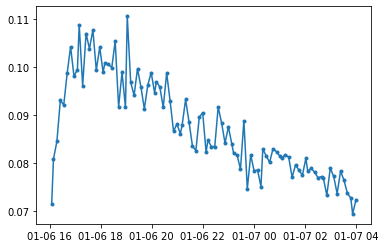

In [161]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_h_1549[::16][:num_points][::2][:-1],avg_pd_h_1549[:num_points][::2],label='H 1549 nm',ls='-',marker='.')
ax.plot(time_h_1549_2[::16][:num_points][::2][:-1],avg_pd_h_1549_2[:num_points][::2],label='H 1549.5 nm',ls='-',marker='.')
ax.plot(time_h_1549_4[::16][:num_points][::2],avg_pd_h_1549_4[:num_points][::2],label='H 1549.9 nm',ls='-',marker='.')
ax.plot(time_h_1549_6[::16][:num_points][::2][:-1],avg_pd_h_1549_6[:num_points][::2],label='H 1549.99 nm',ls='-',marker='.')
ax.plot(time_h_1549_8[::16][:num_points][::2][:-1],avg_pd_h_1549_8[:num_points][::2],label='H 1549.999 nm',ls='-',marker='.')
ax.plot(time_h_1550[::16][:num_points][::2][:-1],avg_pd_h_1550[:num_points][::2],label='H 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"Pd")
#ax.set_ylim(bottom=1,top=10)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

ValueError: x and y must have same first dimension, but have shapes (97,) and (96,)

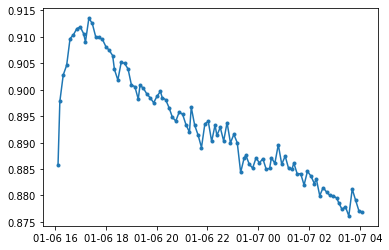

In [162]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_d_1549[::16][:num_points][::2][:-1],avg_pd_d_1549[:num_points][::2],label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][::2],avg_pd_d_1549_2[:num_points][::2],label='D 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][::2],avg_pd_d_1549_4[:num_points][::2],label='D 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][::2],avg_pd_d_1549_6[:num_points][::2],label='D 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][::2],avg_pd_d_1549_8[:num_points][::2],label='D 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][::2],avg_pd_d_1550[:num_points][::2],label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"Pd")
#ax.set_ylim(bottom=1,top=10)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [163]:
theta_h_1549 = []
theta_h_1549_2 = []
theta_h_1549_4 = []
theta_h_1549_6 = []
theta_h_1549_8 = []
theta_h_1550 = []
theta_d_1549 = []
theta_d_1549_2 = []
theta_d_1549_4 = []
theta_d_1549_6 = []
theta_d_1549_8 = []
theta_d_1550 = []

In [164]:
phi_h_1549 = []
phi_h_1549_2 = []
phi_h_1549_4 = []
phi_h_1549_6 = []
phi_h_1549_8 = []
phi_h_1550 = []
phi_d_1549 = []
phi_d_1549_2 = []
phi_d_1549_4 = []
phi_d_1549_6 = []
phi_d_1549_8 = []
phi_d_1550 = []

In [165]:
def fmle(params,*args):
        ph,pv,pd,pa=args
        theta,phi = params
        return -(np.log(np.cos(theta)**2)*ph+np.log(np.sin(theta)**2)*pv+np.log(1/2*(1+np.sin(2*theta)*np.cos(phi)))*pd+np.log(1/2*(1-np.sin(2*theta)*np.cos(phi)))*pa)

In [ ]:
x0=[1,1]
deth=[0.9871669516,0.005069732701,0.6087288026,0.7170778953]
result = minimize(fmle, x0,args=(deth[0],deth[1],deth[2],deth[3]))
global theta_h=result.x[0]
global phi_h=result.x[1]
detv=[0.01283304839,0.9949302673,0.3912711974,0.2829221047]
result = minimize(fmle, x0,args=(detv[0],detv[1],detv[2],detv[3]))
global theta_v=result.x[0]
global phi_v=result.x[1]
detd=[0.6271186954,0.4200500262,0.8608372773,0.0663783128]
result = minimize(fmle, x0,args=(detd[0],detd[1],detd[2],detd[3]))
global theta_d=result.x[0]
global phi_d=result.x[1]
deta=[0.3728813046,0.5799499738,0.1391627227,0.9336216872]
result = minimize(fmle, x0,args=(deta[0],deta[1],deta[2],deta[3]))
global theta_a=result.x[0]
global phi_a=result.x[1]
def fmlenew(params,*args):
        ph,pv,pd,pa=args
        theta,phi = params
        return -(np.log(np.abs(np.cos(theta)*np.cos(theta_h)+np.sin(theta)*np.sin(theta_h)*np.e**(1j*phi_h))**2)*ph
                +np.log(np.abs(np.cos(theta)*np.cos(theta_v)+np.sin(theta)*np.sin(theta_v)*np.e**(1j*phi_v))**2)*pv
                +np.log(np.abs(np.cos(theta)*np.cos(theta_d)+np.sin(theta)*np.sin(theta_d)*np.e**(1j*phi_d))**2)*pd
                +np.log(np.abs(np.cos(theta)*np.cos(theta_a)+np.sin(theta)*np.sin(theta_a)*np.e**(1j*phi_a))**2)*pa)

In [166]:
for i in range(len(avg_vh_h_1549)):
    x0=[1,1]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_h_1549[i]+1),1-1/(avg_vh_h_1549[i]+1),avg_pd_h_1549[i],avg_pa_h_1549[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_h_1549.append(result.x[0]*(180/(np.pi)))
    phi_h_1549.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_h_1549)):
    x0=[1,1]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_h_1549_2[i]+1),1-1/(avg_vh_h_1549_2[i]+1),avg_pd_h_1549_2[i],avg_pa_h_1549_2[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_h_1549_2.append(result.x[0]*(180/(np.pi)))
    phi_h_1549_2.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_h_1549_4)):
    x0=[1,1]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_h_1549_4[i]+1),1-1/(avg_vh_h_1549_4[i]+1),avg_pd_h_1549_4[i],avg_pa_h_1549_4[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_h_1549_4.append(result.x[0]*(180/(np.pi)))
    phi_h_1549_4.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_h_1549_6)):
    x0=[1,1]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_h_1549_6[i]+1),1-1/(avg_vh_h_1549_6[i]+1),avg_pd_h_1549_6[i],avg_pa_h_1549_6[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_h_1549_6.append(result.x[0]*(180/(np.pi)))
    phi_h_1549_6.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_h_1549_8)):
    x0=[1,1]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_h_1549_8[i]+1),1-1/(avg_vh_h_1549_8[i]+1),avg_pd_h_1549_8[i],avg_pa_h_1549_8[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_h_1549_8.append(result.x[0]*(180/(np.pi)))
    phi_h_1549_8.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_h_1550)):
    x0=[1,1]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_h_1550[i]+1),1-1/(avg_vh_h_1550[i]+1),avg_pd_h_1550[i],avg_pa_h_1550[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_h_1550.append(result.x[0]*(180/(np.pi)))
    phi_h_1550.append(result.x[1]*(180/(np.pi)))

/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


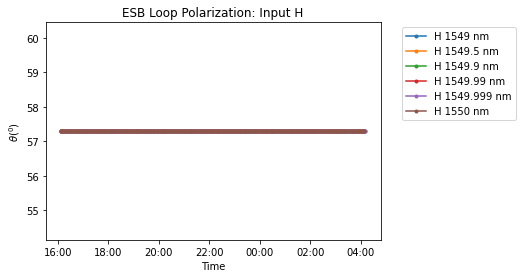

In [167]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_d_1549[::16][:num_points][:-1],theta_h_1549,label='H 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][:-1],theta_h_1549_2,label='H 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][:-1],theta_h_1549_4,label='H 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][:-1],theta_h_1549_6,label='H 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points],theta_h_1549_8,label='H 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][:-1],theta_h_1550,label='H 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\theta (^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("ESB Loop Polarization: Input H")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.savefig('vh_drift_20221214.pdf')

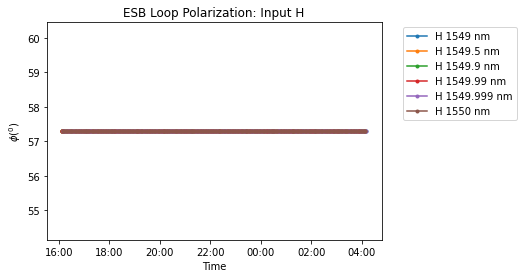

In [168]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_d_1549[::16][:num_points][:-1],phi_h_1549,label='H 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][:-1],phi_h_1549_2,label='H 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][:-1],phi_h_1549_4,label='H 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][:-1],phi_h_1549_6,label='H 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points],phi_h_1549_8,label='H 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][:-1],phi_h_1550,label='H 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi(^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("ESB Loop Polarization: Input H")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.savefig('vh_drift_20221214.pdf')

In [169]:
for i in range(len(avg_vh_d_1549)):
    x0=[np.pi,np.pi]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_d_1549[i]+1),1-1/(avg_vh_d_1549[i]+1),avg_pd_d_1549[i],avg_pa_d_1549[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_d_1549.append(result.x[0]*(180/(np.pi)))
    phi_d_1549.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_d_1549)):
    x0=[np.pi,np.pi]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_d_1549_2[i]+1),1-1/(avg_vh_d_1549_2[i]+1),avg_pd_d_1549_2[i],avg_pa_d_1549_2[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_d_1549_2.append(result.x[0]*(180/(np.pi)))
    phi_d_1549_2.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_d_1549_4)):
    x0=[np.pi,np.pi]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_d_1549_4[i]+1),1-1/(avg_vh_d_1549_4[i]+1),avg_pd_d_1549_4[i],avg_pa_d_1549_4[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_d_1549_4.append(result.x[0]*(180/(np.pi)))
    phi_d_1549_4.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_d_1549_6)):
    x0=[1,1]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_d_1549_6[i]+1),1-1/(avg_vh_d_1549_6[i]+1),avg_pd_d_1549_6[i],avg_pa_d_1549_6[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_d_1549_6.append(result.x[0]*(180/(np.pi)))
    phi_d_1549_6.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_d_1549_8)):
    x0=[1,1]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_d_1549_8[i]+1),1-1/(avg_vh_d_1549_8[i]+1),avg_pd_d_1549_8[i],avg_pa_d_1549_8[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_d_1549_8.append(result.x[0]*(180/(np.pi)))
    phi_d_1549_8.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_d_1550)):
    x0=[1,1]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_d_1550[i]+1),1-1/(avg_vh_d_1550[i]+1),avg_pd_d_1550[i],avg_pa_d_1550[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_d_1550.append(result.x[0]*(180/(np.pi)))
    phi_d_1550.append(result.x[1]*(180/(np.pi)))

/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


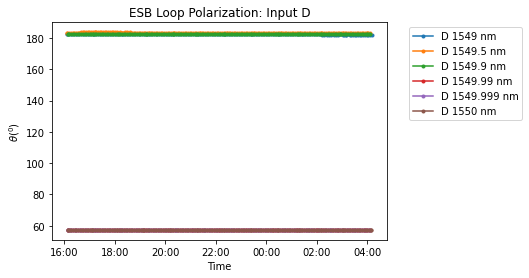

In [170]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_d_1549[::16][:num_points][:-1],theta_d_1549,label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][:-1],theta_d_1549_2,label='D 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][:-1],theta_d_1549_4,label='D 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][:-1],theta_d_1549_6,label='D 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][:-1],theta_d_1549_8,label='D 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][:-1],theta_d_1550,label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\theta (^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("ESB Loop Polarization: Input D")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.savefig('vh_drift_20221214.pdf')

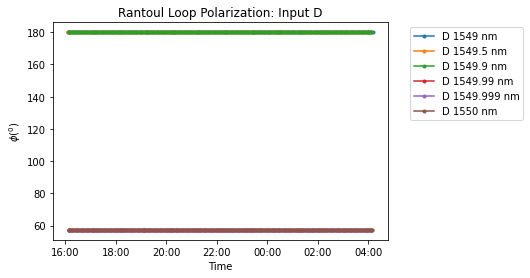

In [171]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_d_1549[::16][:num_points][:-1],phi_d_1549,label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][:-1],phi_d_1549_2,label='D 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][:-1],phi_d_1549_4,label='D 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][:-1],phi_d_1549_6,label='D 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][:-1],phi_d_1549_8,label='D 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][:-1],phi_d_1550,label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi(^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop Polarization: Input D")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.savefig('vh_drift_20221214.pdf')

In [86]:
x0=[1,1]
result = minimize(fmle, x0,args=(1/2,1/2,1,0))
print(result.x[0]*(180/(np.pi)))
print(result.x[1]*(180/(np.pi)))

45.000074738014376
-9.462562802439376e-05
